In [144]:
# Commands to install some of the libraries in-case if they are not installed
# Any other library that needs to be installed just use: !pip install <library name>
# !pip install seaborn
# !pip install missingno
# !pip install xgboost
# !pip install catboost
# !pip install regex
# !pip install sklearn
# !pip install pandas
# !pip install numpy
# !pip install imblearn
# !pip install lightgbm

In [145]:
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # linear algebra
import matplotlib.pyplot as plt  #graphs and plots
import seaborn as sns   #data visualizations 
import csv # Some extra functionalities for csv  files - reading it as a dictionary
from lightgbm import LGBMClassifier #sklearn is for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction 

from sklearn.model_selection import train_test_split, cross_validate   #break up dataset into train and test sets

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# importing python library for working with missing data
import missingno as msno
# To install missingno use: !pip install missingno
import re    # This library is used to perform regex pattern matching

# import various functions from sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [146]:
diabetes = pd.read_csv('diabetic_data.csv')

In [147]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [148]:
diabetes.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [156]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   race                      99493 non-null   object 
 1   gender                    101766 non-null  object 
 2   age                       101766 non-null  object 
 3   weight                    3197 non-null    object 
 4   admission_type_id         96475 non-null   float64
 5   discharge_disposition_id  98075 non-null   float64
 6   admission_source_id       94985 non-null   float64
 7   time_in_hospital          101766 non-null  int64  
 8   payer_code                61510 non-null   object 
 9   medical_specialty         51817 non-null   object 
 10  num_lab_procedures        101766 non-null  int64  
 11  num_procedures            101766 non-null  int64  
 12  num_medications           101766 non-null  int64  
 13  number_outpatient         101766 non-null  i

**Data Cleaning**



The encounter id and patient number are an identifiers to uniquely identify the visit of a patient in a hospital. each of the rows are individual instances. there are no importance of these variables from prediction point to of view, so we should just drop these columns.

In [150]:
diabetes.drop(['encounter_id','patient_nbr'], axis=1, inplace=True)

In [161]:
def missing (diabetes):
    missing_number = diabetes.isnull().sum().sort_values(ascending=False)
    missing_percent = (diabetes.isnull().sum()/diabetes.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent']).round(4)*100
    return missing_values

missing(diabetes).head()

,Missing_Number,Missing_Percent
weight,9856900,96.86
max_glu_serum,9642000,94.75
A1Cresult,8474800,83.28
medical_specialty,4994900,49.08
payer_code,4025600,39.56


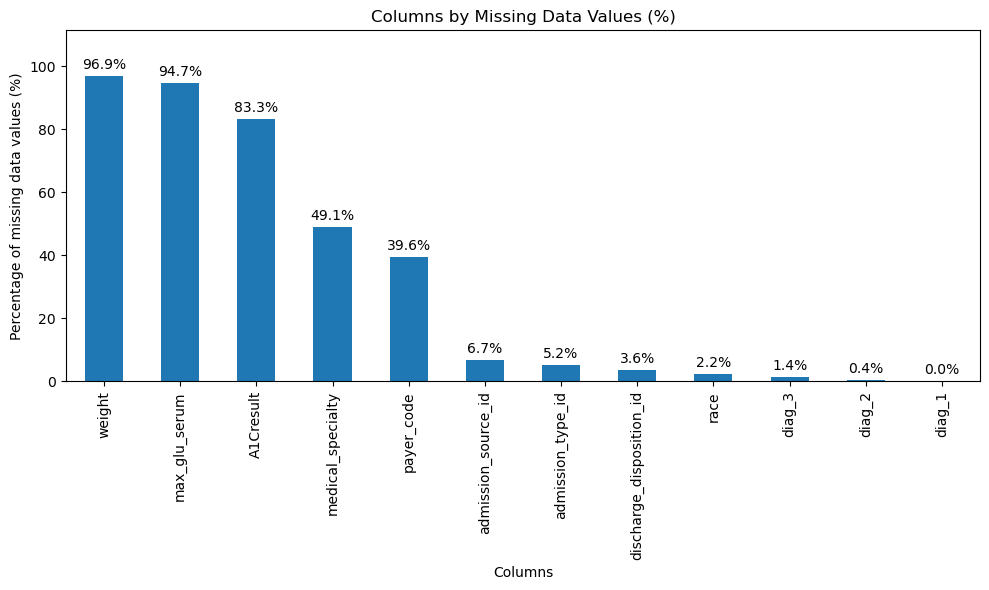

In [152]:
missing_data_pct = diabetes.isna().mean().sort_values(ascending=False) * 100
missing_data_pct_positive = missing_val_pct[missing_val_pct > 0]
plt.figure(figsize=(10,6))
plt1 = missing_val_pct_positive.plot(kind='bar')
plt1.bar_label(plt1.containers[0], padding=3, fmt='%.1f%%')
plt.ylabel('Percentage of missing data values (%)')
plt.xlabel('Columns')
plt.title('Columns by Missing Data Values (%)')
plt.xticks(rotation=90)
plt.ylim(0, missing_data_pct_positive.max() * 1.15)
plt.tight_layout()
plt.show()

This bar chart illustrates a data quality assessment of missing values in the diabetes dataset. Specifically, variables like weight, max_glu_serum, and A1Cresult are missing over 83% of their data, making them primary candidates for cleaning and potential removal. Ultimately, the chart suggests that while the administrative and diagnostic data is clean, the physical and laboratory measurements in this dataset are largely absent and may introduce significant bias.

In [154]:
diabetes.duplicated().sum() # no duplicated records

np.int64(0)

Replaced ? values with null values. Replaced admission type 6, discharge disposition 18, admission source id 17 with null values, according to IDS mapping.

In [158]:
diabetes.replace("?", np.nan, inplace=True)
diabetes['admission_type_id'] = diabetes['admission_type_id'].replace(6, np.nan)
diabetes['discharge_disposition_id'] = diabetes['discharge_disposition_id'].replace(18, np.nan)
diabetes['admission_source_id'] = diabetes['admission_source_id'].replace(17, np.nan)